### 线性判别分析
Linear Discriminant Analysis
LDA降维

In [1]:
import pandas as pd


In [2]:
feature_dict = {i:label for i,label in zip(range(4),('sepal length in cm',
                                                     'sepal width in cm',
                                                     'petal length in cm',
                                                     'petal width in cm'))}

In [11]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context # 全局取消证书验证

# df = pd.io.parsers.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
#                             header=None, sep=',')
df = pd.read_csv('/Users/joey/Documents/PycharmProjects/mywork/dimensionality_reduction_algorithm/iris.data',
                 header=None, sep=',')
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how='all', inplace=True)
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# 标签转换
from sklearn.preprocessing import LabelEncoder

X = df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) +1
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [15]:
type(y)

numpy.ndarray

### 每类的均值
分别求三种鸢尾花数据在不同特征维度上的均值向量 mi


In [16]:
import numpy as np
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' % (cl, mean_vectors[cl-1]))


Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



### 计算两个 4×4 维矩阵：类内散布矩阵和类间散布矩阵

In [17]:
S_W = np.zeros((4, 4))
for cl, mv in zip(range(1, 4), mean_vectors):
    class_sc_mat = np.zeros((4, 4))
    for row in X[y==cl]:
        row, mv = row.reshape(4, 1), mv.reshape(4, 1)
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat
print('within_class Scatter Matrix:\n',S_W)



within_class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


### 类间散布矩阵

In [19]:
overall_mean = np.mean(X, axis=0)
overall_mean

array([5.8433, 3.054 , 3.7587, 1.1987])

In [27]:
S_B = np.zeros((4, 4))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4, 1)
    overall_mean = overall_mean.reshape(4, 1)
    S_B = n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 27.7264  -2.9787  66.7718  30.8044]
 [ -2.9787   0.32    -7.1733  -3.3093]
 [ 66.7718  -7.1733 160.8022  74.1842]
 [ 30.8044  -3.3093  74.1842  34.224 ]]


求解矩阵特征值

In [35]:
# 矩阵的逆 和 求解特征值
# eig：矩阵特征
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4, 1)
    print('\nEigenvector {} \n{}'.format(i+1, eigvec_sc.real))
    print('\nEigenvector {:} \n{:.2e}'.format(i+1, eig_vals[i].real))


eig_vals, eig_vecs


Eigenvector 1 
[[-0.9084]
 [-0.1427]
 [ 0.2208]
 [ 0.3252]]

Eigenvector 1 
0.00e+00

Eigenvector 2 
[[-0.2007]
 [-0.3343]
 [ 0.5172]
 [ 0.7618]]

Eigenvector 2 
1.15e+01

Eigenvector 3 
[[ 0.1138]
 [ 0.9894]
 [ 0.0351]
 [-0.0827]]

Eigenvector 3 
-2.74e-16

Eigenvector 4 
[[ 0.3479]
 [-0.8682]
 [-0.2819]
 [ 0.2138]]

Eigenvector 4 
9.90e-16


(array([ 0.0000e+00,  1.1502e+01, -2.7445e-16,  9.9015e-16]),
 array([[-0.9084, -0.2007,  0.1138,  0.3479],
        [-0.1427, -0.3343,  0.9894, -0.8682],
        [ 0.2208,  0.5172,  0.0351, -0.2819],
        [ 0.3252,  0.7618, -0.0827,  0.2138]]))

### 特征值与特征向量：
- 特征向量：表示映射方向
- 特征值：特征向量的重要程度

In [36]:
# Make a list of （eigenvalue, eigenvector） tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs


[(0.0, array([-0.9084, -0.1427,  0.2208,  0.3252])),
 (11.502068480519963, array([-0.2007, -0.3343,  0.5172,  0.7618])),
 (2.744510404414751e-16, array([ 0.1138,  0.9894,  0.0351, -0.0827])),
 (9.901521697396263e-16, array([ 0.3479, -0.8682, -0.2819,  0.2138]))]

In [42]:
# Sort the (eigenvalue, eigencector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in decressing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decressing order:

11.502068480519963
9.901521697396263e-16
2.744510404414751e-16
0.0


In [48]:
# 每个特征值所占的百分比
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
print(eigv_sum)

for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

11.502068480519965
11.502068480519963
eigenvalue 1: 100.00%
9.901521697396263e-16
eigenvalue 2: 0.00%
2.744510404414751e-16
eigenvalue 3: 0.00%
0.0
eigenvalue 4: 0.00%


In [57]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2007  0.3479]
 [-0.3343 -0.8682]
 [ 0.5172 -0.2819]
 [ 0.7618  0.2138]]


In [58]:
# 降维到2维
X_lda = X.dot(W)
assert X_lda.shape == (150, 2), 'The matrix is not 150x2 dimensional'

X_lda

array([[-1.3174, -1.6161],
       [-1.1101, -1.2516],
       [-1.1885, -1.4666],
       [-1.0316, -1.4709],
       [-1.3308, -1.7377],
       [-1.2038, -1.9008],
       [-1.1074, -1.6818],
       [-1.2122, -1.5922],
       [-0.9763, -1.3387],
       [-1.168 , -1.3879],
       [-1.3928, -1.7135],
       [-1.1203, -1.69  ],
       [-1.1662, -1.3077],
       [-1.221 , -1.3972],
       [-1.7285, -1.7503],
       [-1.5347, -2.1741],
       [-1.4107, -1.788 ],
       [-1.2412, -1.5947],
       [-1.3068, -1.731 ],
       [-1.2898, -1.8833],
       [-1.189 , -1.5094],
       [-1.1802, -1.7751],
       [-1.4574, -1.7641],
       [-0.8668, -1.4628],
       [-0.9651, -1.7746],
       [-1.0267, -1.2731],
       [-1.0081, -1.5777],
       [-1.2857, -1.6095],
       [-1.304 , -1.4945],
       [-1.0334, -1.5512],
       [-1.02  , -1.4295],
       [-1.1401, -1.4103],
       [-1.5625, -2.1518],
       [-1.6317, -2.0846],
       [-1.168 , -1.3879],
       [-1.3005, -1.334 ],
       [-1.4494, -1.4487],
 

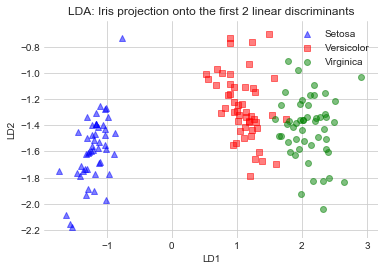

In [63]:
from matplotlib import pyplot as plt
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

def plot_step_lda():
    plt.style.use('seaborn-white')
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)


    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()


In [64]:
# sklearn 自带LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)


In [68]:
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

def plot_scikit_lda(X, title):
    plt.style.use('seaborn-white')
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout
    plt.show()



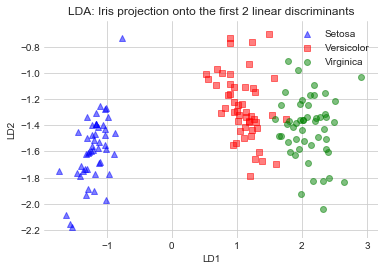

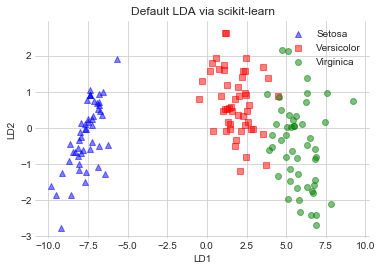

In [69]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')